In [29]:
# %pip install datasets
# %pip install matplotlib

In [30]:
from datasets import load_dataset

In [31]:
ds = load_dataset("Elfsong/Venus_t")

In [32]:
ds['train'].features

{'question_id': Value(dtype='int64', id=None),
 'name': Value(dtype='string', id=None),
 'content': Value(dtype='string', id=None),
 'acRate': Value(dtype='float64', id=None),
 'difficulty': Value(dtype='string', id=None),
 'topics': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'runtimeDistribution': Value(dtype='string', id=None),
 'memoryDistribution': Value(dtype='string', id=None),
 'rt_list': [{'code': Value(dtype='string', id=None),
   'runtime': Value(dtype='string', id=None)}],
 'rt_solution_count': Value(dtype='int64', id=None),
 'mm_list': [{'code': Value(dtype='string', id=None),
   'memory': Value(dtype='string', id=None)}],
 'mm_solution_count': Value(dtype='int64', id=None),
 'code_prompt': Value(dtype='string', id=None),
 'test_case_generator': Value(dtype='string', id=None),
 'entry_point': Value(dtype='string', id=None),
 'libraries': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'import_code': Value(dtype='string', id

In [33]:
rt_dist = ds['train'][0]['runtimeDistribution']

In [34]:
import json

In [35]:
rt_dist = json.loads(rt_dist)

In [36]:
test_case = ds['train'][10]['test_case']
# test_case = json.loads(test_case)
test_cases = [json.loads(obj) for obj in test_case.strip().split('\n') if obj]
(test_cases)

[{'input': '8', 'output': '8'},
 {'input': '16', 'output': '16'},
 {'input': '4', 'output': '4'},
 {'input': '7', 'output': 'None'},
 {'input': '9', 'output': 'None'},
 {'input': '16', 'output': '16'},
 {'input': '2', 'output': '2'},
 {'input': '5', 'output': 'None'},
 {'input': '16', 'output': '16'},
 {'input': '2', 'output': '2'},
 {'input': '4', 'output': '4'},
 {'input': '2', 'output': '2'},
 {'input': '4', 'output': '4'},
 {'input': '0', 'output': '0'},
 {'input': '-1', 'output': 'None'},
 {'input': '32', 'output': '32'},
 {'input': '4', 'output': '4'},
 {'input': '0', 'output': '0'},
 {'input': '3', 'output': 'None'},
 {'input': '4', 'output': '4'},
 {'input': '-1', 'output': 'None'},
 {'input': '0', 'output': '0'},
 {'input': '7', 'output': 'None'},
 {'input': '7', 'output': 'None'},
 {'input': '64', 'output': '64'},
 {'input': '7', 'output': 'None'},
 {'input': '1', 'output': '1'},
 {'input': '-1', 'output': 'None'},
 {'input': '0', 'output': '0'},
 {'input': '32', 'output': '3

In [37]:
print(ds['train'][1]['setup_code'])

class Solution:
    def minCut(self, s: str) -> int:
        n = len(s)
        memo_c = [None] * n
        memo_p = [[None] * n for _ in range(n)]
        
        def helper(start, end):
            cut = end
            if start == end or is_p(start, end):
                return 0
            if memo_c[start] is not None:
                return memo_c[start]
            for i in range(start, end + 1):
                if is_p(start, i):
                    cut = min(cut, 1 + helper(i + 1, end))
            
            memo_c[start] = cut
            return cut

        def is_p(start, end):
            if start >= end:
                return True
            if memo_p[start][end] is not None:
                return memo_p[start][end]
            memo_p[start][end] = (s[start] == s[end] and is_p(start + 1, end - 1))
            return memo_p[start][end]

        return helper(0, n - 1)

class TestCaseGenerator:
    def generate(self) -> dict:
        """
        Generates a test case

In [38]:
import matplotlib.pyplot as plt


In [39]:
def plot_distribution(data, name=None, instance=None):
    x = [int(item[0]) for item in data]
    y = [item[1] for item in data]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b', label="Distribution")
    
    # If an instance tuple is provided, plot it with a different color
    if instance is not None:
        # Assuming the instance tuple is (runtime, frequency)
        instance_runtime = (instance[0])
        instance_freq = instance[1]
        plt.plot(instance_runtime, instance_freq, marker='o', markersize=10, 
                 linestyle='None', color='r', label="Instance")
    
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.title(f"{name} Distribution")
    plt.grid(True)
    plt.legend()
    plt.show()

In [40]:
import pandas as pd

In [41]:

def to_pandas_df(data, name):
    dist_df = pd.DataFrame(data, columns=[name, 'frequency'])

    # Convert the 'Runtime' column from string to integer
    dist_df[name] = dist_df[name].astype(int)

    # Sort the DataFrame by runtime
    dist_df.sort_values(name, inplace=True)

    # Compute the cumulative sum of frequencies
    # dist_df['Cumulative'] = dist_df['frequency'].cumsum()

    return dist_df

In [42]:
dist_df = to_pandas_df(rt_dist['distribution'], 'runtime')

In [43]:
# Picking a random sample to see where it fit on the distribution
row = dist_df.sample(n=1)
row

,runtime,frequency
74,519,0.6042


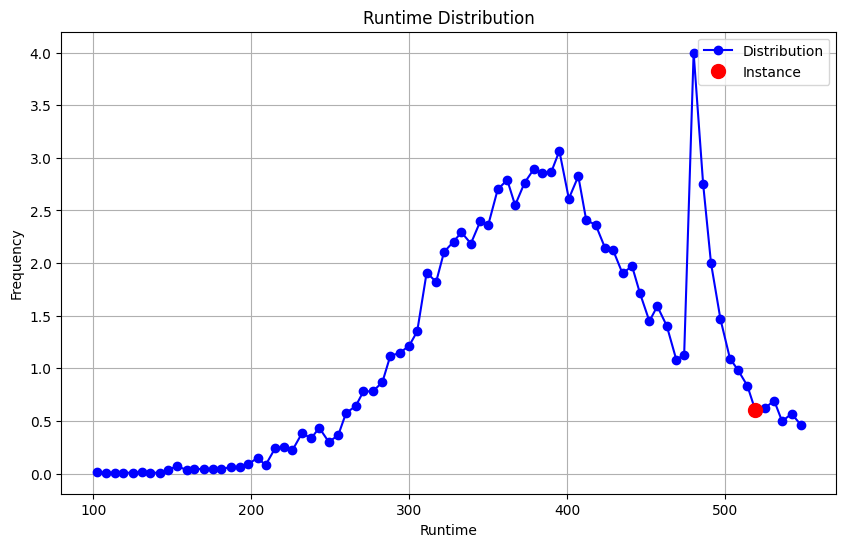

In [44]:
point = (int(row['runtime'].iloc[0]), row['frequency'])
plot_distribution(rt_dist['distribution'], 'Runtime', point)

In [45]:
import numpy as np

In [46]:
# get the nth percentile value of the distribution
def get_nth_percentile(distribution_df, percentile, metric):
    data = np.array(distribution_df[metric])
    return np.percentile(data, percentile)

# check if an instance of the distribution falls into the nth percentile
def is_within_nth_percentile(nth_percentile, instance):
    return instance <= nth_percentile

In [47]:
get_nth_percentile(dist_df, 25, 'runtime')

213.5

# Constructing the dataset

In [48]:
# json_dataset = []

# # Iterate over the 'train' split
# for row in ds["train"]:
#     # Runtime solutions
#     runtime_efficient_codes = []
#     runtime_inefficient_codes = []
#     runtime_moderate_codes = []

#     # Memory solutions
#     memory_efficient_codes = []
#     memory_inefficient_codes = []
#     memory_moderate_codes = []

#     # Get both runtime and memory distribution for the current problem
#     runtime_distribution = to_pandas_df(json.loads(row['runtimeDistribution'])['distribution'], 'runtime')
#     memory_distribution = to_pandas_df(json.loads(row['memoryDistribution'])['distribution'], 'memory')

#     # Obtain the 25th and 75th percentile 
#     runtime_twenty_fifth_percentile = get_nth_percentile(runtime_distribution, 25, 'runtime')
#     runtime_seventy_fifth_percentile = get_nth_percentile(runtime_distribution, 75, 'runtime')

#     for rt_item in row['rt_list']:
#         # runtime of the current solution
#         runtime = int(rt_item['runtime'])

#         if runtime <= runtime_twenty_fifth_percentile:
#             runtime_efficient_codes.append(rt_item)
#         elif runtime >= runtime_seventy_fifth_percentile:
#             runtime_inefficient_codes.append(rt_item)
#         else:
#             runtime_moderate_codes.append(rt_item)


#     # Obtain the 75th percentile for both runtime and memory distribution
#     memory_twenty_fifth_percentile = get_nth_percentile(memory_distribution, 25, 'memory')
#     memory_seventy_fifth_percentile = get_nth_percentile(memory_distribution, 75, 'memory')

#     # Applying the same concept as the above, but for memory efficent code
#     for mm_item in row['mm_list']:
#         # memory of the current solution
#         memory = int(mm_item['memory'])

#         if memory <= memory_twenty_fifth_percentile:
#             memory_efficient_codes.append(mm_item)
#         elif memory >= memory_seventy_fifth_percentile:
#             memory_inefficient_codes.append(mm_item)
#         else:
#             memory_moderate_codes.append(mm_item)

#     # Adding the test cases for the problem
#     test_cases = [json.loads(obj) for obj in row['test_case'].strip().split('\n') if obj]

#     json_data = {
#         'question_id': row['question_id'],
#         'name': row['name'],
#         'prompt': row['content'],
#         'difficulty': row['difficulty'],
#         'topics': row['topics'],
#         'runtime_inefficient_codes': runtime_inefficient_codes,
#         'runtime_moderate_codes': runtime_moderate_codes,
#         'runtime_efficient_codes': runtime_efficient_codes,
#         'memory_inefficient_codes': memory_inefficient_codes,
#         'memory_moderate_codes': memory_moderate_codes,
#         'memory_efficient_codes': memory_efficient_codes,
#         'test_cases': test_cases
#     }

#     json_dataset.append(json_data)


In [75]:
json_dataset = []

# Set target counts for each difficulty so that total samples equal 200.
# Here we assign 66 for 'easy' and 67 for 'medium' and 'hard'.
target_counts = {'easy': 66, 'medium': 67, 'hard': 67}
difficulty_counts = {'easy': 0, 'medium': 0, 'hard': 0}

# Iterate over the 'train' split and build a balanced dataset
for row in ds["train"]:
    # Normalize difficulty (assumed to be a string) to lowercase
    difficulty = row['difficulty'].strip().lower()
    
    # If the difficulty is not one of our targets or if we've reached its target count, skip it
    if difficulty not in target_counts or difficulty_counts[difficulty] >= target_counts[difficulty]:
        continue

    # Process runtime solutions
    runtime_efficient_codes = []
    runtime_inefficient_codes = []
    runtime_moderate_codes = []
    
    # Process memory solutions
    memory_efficient_codes = []
    memory_inefficient_codes = []
    memory_moderate_codes = []

    # Get runtime and memory distributions
    runtime_distribution = to_pandas_df(json.loads(row['runtimeDistribution'])['distribution'], 'runtime')
    memory_distribution = to_pandas_df(json.loads(row['memoryDistribution'])['distribution'], 'memory')

    # Calculate the 25th and 75th percentiles for runtime
    runtime_twenty_fifth_percentile = get_nth_percentile(runtime_distribution, 25, 'runtime')
    runtime_seventy_fifth_percentile = get_nth_percentile(runtime_distribution, 75, 'runtime')

    for rt_item in row['rt_list']:
        runtime = int(rt_item['runtime'])
        if runtime <= runtime_twenty_fifth_percentile:
            runtime_efficient_codes.append(rt_item)
        elif runtime >= runtime_seventy_fifth_percentile:
            runtime_inefficient_codes.append(rt_item)
        else:
            runtime_moderate_codes.append(rt_item)

    # Calculate the 25th and 75th percentiles for memory
    memory_twenty_fifth_percentile = get_nth_percentile(memory_distribution, 25, 'memory')
    memory_seventy_fifth_percentile = get_nth_percentile(memory_distribution, 75, 'memory')

    for mm_item in row['mm_list']:
        memory = int(mm_item['memory'])
        if memory <= memory_twenty_fifth_percentile:
            memory_efficient_codes.append(mm_item)
        elif memory >= memory_seventy_fifth_percentile:
            memory_inefficient_codes.append(mm_item)
        else:
            memory_moderate_codes.append(mm_item)

    # Balance the code efficiency categories by truncating to the smallest group size
    min_runtime_codes = min(len(runtime_efficient_codes), len(runtime_moderate_codes), len(runtime_inefficient_codes))
    min_memory_codes = min(len(memory_efficient_codes), len(memory_moderate_codes), len(memory_inefficient_codes))

    runtime_efficient_codes = runtime_efficient_codes[:min_runtime_codes]
    runtime_moderate_codes = runtime_moderate_codes[:min_runtime_codes]
    runtime_inefficient_codes = runtime_inefficient_codes[:min_runtime_codes]

    memory_efficient_codes = memory_efficient_codes[:min_memory_codes]
    memory_moderate_codes = memory_moderate_codes[:min_memory_codes]
    memory_inefficient_codes = memory_inefficient_codes[:min_memory_codes]

    # Process test cases (assuming each line in 'test_case' is a JSON object)
    test_cases = [json.loads(obj) for obj in row['test_case'].strip().split('\n') if obj]

    # Build the JSON object for this problem
    json_data = {
        'question_id': row['question_id'],
        'name': row['name'],
        'prompt': row['content'],
        'difficulty': row['difficulty'],
        'topics': row['topics'],
        'runtime_inefficient_codes': runtime_inefficient_codes,
        'runtime_moderate_codes': runtime_moderate_codes,
        'runtime_efficient_codes': runtime_efficient_codes,
        'memory_inefficient_codes': memory_inefficient_codes,
        'memory_moderate_codes': memory_moderate_codes,
        'memory_efficient_codes': memory_efficient_codes,
        "entry_point": row['entry_point'],
        "import_code": row['import_code'],
        "setup_code": row["setup_code"],
        'test_cases': test_cases
    }

    # Add the processed problem to the dataset
    json_dataset.append(json_data)

    # Update count for this difficulty
    difficulty_counts[difficulty] += 1

    # Break early if we have reached a total of 200 samples
    if sum(difficulty_counts.values()) >= 200:
        break

print("Final difficulty counts:", difficulty_counts)


Final difficulty counts: {'easy': 66, 'medium': 67, 'hard': 67}


In [76]:
with open('dataset.json', 'w') as json_file:
    json.dump(json_dataset, json_file, indent=4)

HARISH PRE-PROCESSING TC's

In [71]:
diverse_sample_df = pd.DataFrame(json_dataset)
diverse_sample_df['difficulty']

0      medium
1        hard
2        hard
3      medium
4      medium
        ...  
195      hard
196      hard
197      hard
198      hard
199      hard
Name: difficulty, Length: 200, dtype: object

In [72]:
print(len(diverse_sample_df['runtime_efficient_codes']), len(diverse_sample_df['runtime_inefficient_codes']), len(diverse_sample_df['runtime_moderate_codes']))
print(len(diverse_sample_df['memory_efficient_codes']), len(diverse_sample_df['memory_inefficient_codes']), len(diverse_sample_df['memory_moderate_codes']))

200 200 200
200 200 200


In [73]:
print(f"Length of samples: ", len(diverse_sample_df))
# Display the first few rows of the resulting DataFrame
display((diverse_sample_df['topics'].value_counts()))

Length of samples:  200


topics
[array, dynamic-programming]                                                  9
[string, dynamic-programming]                                                 7
[array, binary-search]                                                        6
[string]                                                                      5
[two-pointers, string]                                                        4
                                                                             ..
[array, hash-table]                                                           1
[math, dynamic-programming, tree, binary-search-tree, binary-tree]            1
[dynamic-programming, backtracking, tree, binary-search-tree, binary-tree]    1
[hash-table, string, breadth-first-search]                                    1
[string, dynamic-programming, prefix-sum]                                     1
Name: count, Length: 134, dtype: int64